In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from ipywidgets import interact, widgets
import os 
os.chdir("C:/Python/Datasets")

In [2]:
df = pd.read_csv("FRED-NROUST.csv")
y_train = df['Value'].iloc[:-8]
y_test = df['Value'].iloc[-8:]
y_train.shape, y_test.shape

((288,), (8,))

In [15]:
model = ARIMA(y_train,order=(1,1,1))
model_fit = model.fit()
#print('Coefficients: %s' % model_fit.params)
predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

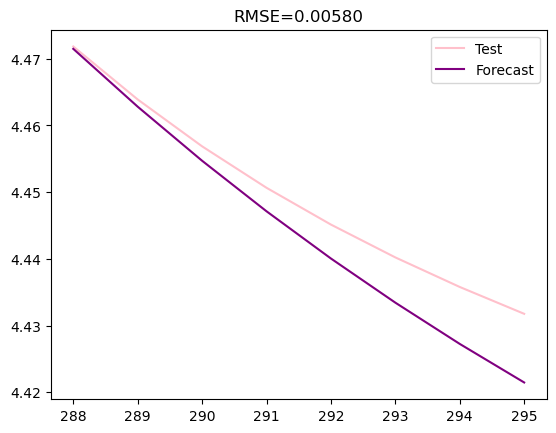

In [9]:
y_test.plot(color="pink", label='Test')
predictions.plot(color="purple", label='Forecast')
rmse = root_mean_squared_error(y_test, predictions)
plt.title(f"RMSE={rmse:.5f}")
plt.legend(loc='best')
plt.show()

In [ ]:
def arima(p,d,q):
    model = ARIMA(y_train,order=(p,d,q))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
    y_test.plot(color="pink", label='Test')
    predictions.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, predictions)
    plt.title(f"RMSE={rmse:.5f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact( arima, p=(0,5,1), d=(0,5,1), q=(0,5,1) )

interactive(children=(IntSlider(value=2, description='p', max=5), IntSlider(value=2, description='d', max=5), …

<function __main__.arima(p, d, q)>

#### Auto ARIMA

In [20]:
from pmdarima.arima import auto_arima

In [22]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.w

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1723.154, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1732.540, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1730.411, Time=0.11 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-1732.234, Time=0.21 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1731.316, Time=0.04 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1730.772, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1730.550, Time=0.07 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.386 seconds


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


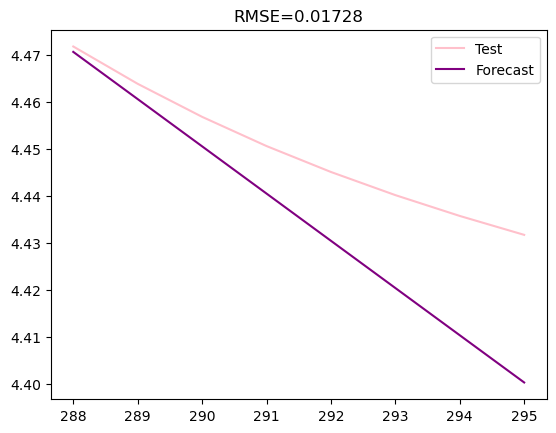

In [29]:
predictions = model.predict(n_periods=len(y_test))
predictions = pd.Series(predictions,index = y_test.index)
rmse = root_mean_squared_error(y_test, predictions)
y_test.plot(color="pink", label='Test')
predictions.plot(color="purple", label='Forecast')
plt.title(f"RMSE={rmse:.5f}")
plt.legend(loc='best')
plt.show()

In [27]:
predictions

,0
288,4.470681
289,4.460640
290,4.450592
291,4.440546
292,4.430499
293,4.420453
294,4.410406
295,4.400360


#### Beer Production

In [30]:
beer = pd.read_csv("monthly-beer-production-in-austr.csv")
y = beer['Monthly beer production']
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]

In [ ]:
def arima(p,d,q):
    model = ARIMA(y_train,order=(p,d,q))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
    y_test.plot(color="pink", label='Test')
    predictions.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, predictions)
    plt.title(f"RMSE={rmse:.5f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact( arima, p=(0,5,1), d=(0,5,1), q=(0,5,1) )

interactive(children=(IntSlider(value=2, description='p', max=5), IntSlider(value=2, description='d', max=5), …

<function __main__.arima(p, d, q)>

#### Seasonal ARIMA

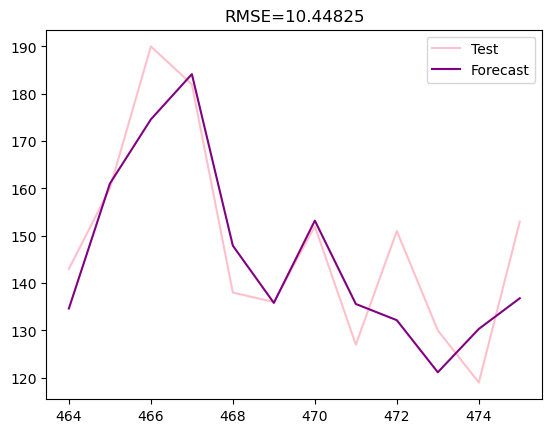

In [32]:
model = ARIMA(y_train,order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
y_test.plot(color="pink", label='Test')
predictions.plot(color="purple", label='Forecast')
rmse = root_mean_squared_error(y_test, predictions)
plt.title(f"RMSE={rmse:.5f}")
plt.legend(loc='best')
plt.show()

In [ ]:
def sarima(p,d,q, P, D, Q, S):
    model = ARIMA(y_train,order=(p,d,q),seasonal_order=(P, D, Q, S))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
    y_test.plot(color="pink", label='Test')
    predictions.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, predictions)
    plt.title(f"RMSE={rmse:.5f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact( sarima, p=(0,5,1), d=(0,5,1), q=(0,5,1),
                 P=(0,5,1), D=(0,5,1), Q=(0,5,1) , S=12 )

interactive(children=(IntSlider(value=2, description='p', max=5), IntSlider(value=2, description='d', max=5), …

<function __main__.sarima(p, d, q, P, D, Q, S)>

In [36]:
model = auto_arima(y_train, trace=True,   error_action='ignore', 
                   suppress_warnings=True, seasonal=True,m=12)

c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.w

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3469.156, Time=1.65 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4070.292, Time=0.01 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3807.869, Time=0.29 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3839.739, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4068.306, Time=0.02 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3799.097, Time=0.72 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.67 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3470.655, Time=3.98 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3467.163, Time=3.28 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=3715.554, Time=1.64 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.47 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=3.50 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=3504.562, Time=3.08 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,2)[12] intercept   : AIC=3469.989, Time=3.82 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,2)[12] intercept   : AIC=3408.925, Time=3.95 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=3717.317, Time=2.38 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,1)[12] intercept   : AIC=3411.089, Time=1.85 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,2)[12] intercept   : AIC=inf, Time=4.93 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=3799.548, Time=0.93 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,1)[12] intercept   : AIC=3414.089, Time=4.24 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,2)[12] intercept   : AIC=3466.989, Time=3.36 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,2)[12] intercept   : AIC=3422.606, Time=4.38 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(1,0,2)[12] intercept   : AIC=3451.121, Time=4.36 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(1,0,2)[12] intercept   : AIC=3466.858, Time=3.76 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,2)[12] intercept   : AIC=3398.962, Time=4.87 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,2)[12] intercept   : AIC=3693.848, Time=4.27 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,1)[12] intercept   : AIC=3450.469, Time=2.09 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,2)[12] intercept   : AIC=inf, Time=5.71 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,1)[12] intercept   : AIC=3775.201, Time=1.86 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,1)[12] intercept   : AIC=3405.620, Time=4.18 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(1,0,2)[12] intercept   : AIC=3450.006, Time=4.76 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(1,0,2)[12] intercept   : AIC=inf, Time=6.39 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(1,0,2)[12] intercept   : AIC=3437.612, Time=5.21 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(1,0,2)[12] intercept   : AIC=3410.093, Time=4.51 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(1,0,2)[12] intercept   : AIC=inf, Time=6.60 sec


c:\Python\anaconda3\envs\hf\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,2)[12]             : AIC=3403.326, Time=4.21 sec

Best model:  ARIMA(3,1,4)(1,0,2)[12] intercept
Total fit time: 114.308 seconds
